### lecture 21 - Facebook's Prophet Basics

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

#### dataset

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [75]:
df = pd.read_csv('./dataset/BeerWineLiquor.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [77]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [78]:
df.columns = ['ds','y']

In [79]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [80]:
df['ds'] = pd.to_datetime(df['ds'])

In [81]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


#### model fit

In [83]:
m = Prophet()

In [84]:
m.fit(df)

17:52:47 - cmdstanpy - INFO - Chain [1] start processing
17:52:47 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
# placeholder to hold out future predictions

# df.index.freq = '' --> before 
future = m.make_future_dataframe(periods=24,freq='MS')

In [86]:
future.tail() # extended column of ds 

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [87]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [88]:
len(df)

324

In [89]:
len(future) # 324 + 24

348

#### predictions

In [90]:
forecast = m.predict(future)

In [91]:
forecast.head() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1763.763820,1142.072779,1456.771493,1763.763820,1763.763820,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,0.0,0.0,0.0,1302.445544
1,1992-02-01,1766.914160,1174.352022,1496.600493,1766.914160,1766.914160,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,0.0,0.0,0.0,1340.499281
2,1992-03-01,1769.861253,1409.905227,1747.027837,1769.861253,1769.861253,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,0.0,0.0,0.0,1591.380524
3,1992-04-01,1773.011594,1416.817792,1750.986963,1773.011594,1773.011594,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,0.0,0.0,0.0,1576.939880
4,1992-05-01,1776.060310,1671.211762,1973.175168,1776.060310,1776.060310,44.753299,44.753299,44.753299,44.753299,44.753299,44.753299,0.0,0.0,0.0,1820.813610


In [92]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [93]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4480.843283,4798.878233,4628.375264
337,2020-02-01,4514.611223,4840.759407,4679.316031
338,2020-03-01,4773.345703,5106.866019,4942.252882
339,2020-04-01,4780.181784,5106.435449,4940.699267
340,2020-05-01,5048.432453,5359.203286,5197.044315
341,2020-06-01,5010.771295,5329.268215,5177.448924
342,2020-07-01,5145.733140,5477.258284,5309.517039
343,2020-08-01,5055.238290,5400.609348,5239.079018
344,2020-09-01,4909.783881,5231.865155,5081.918552
345,2020-10-01,5030.986662,5339.306415,5187.707688


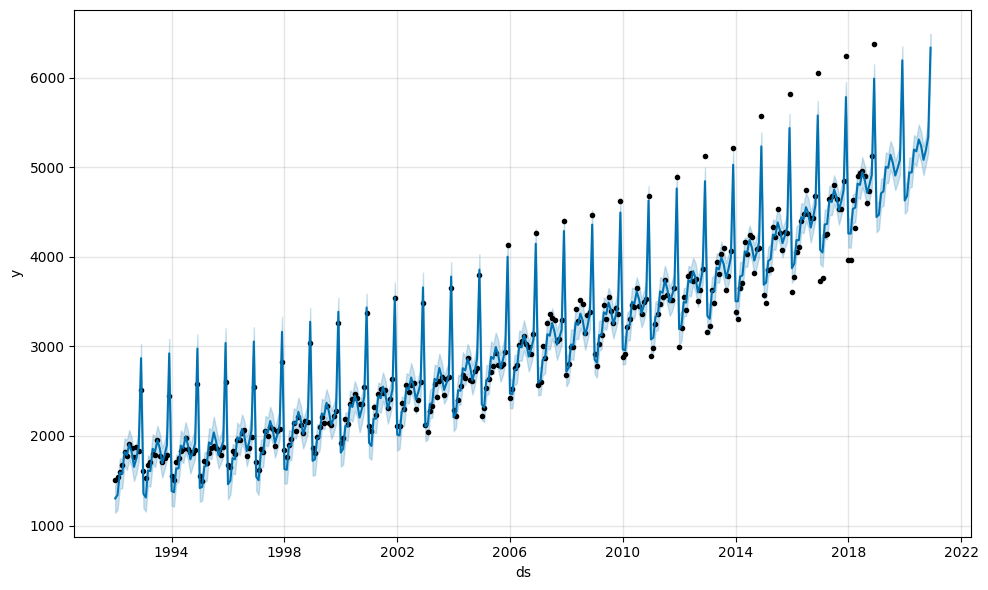

In [97]:
m.plot(forecast); # by using prophet built in functions

<Axes: xlabel='ds'>

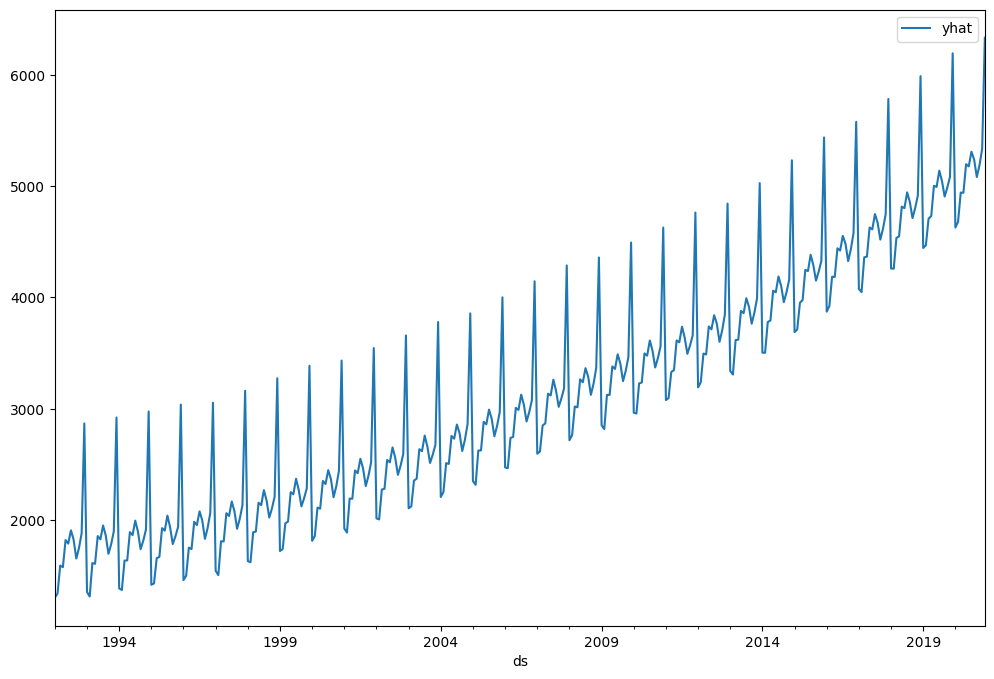

In [99]:
forecast.plot(x='ds',y='yhat',figsize=(12,8))

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

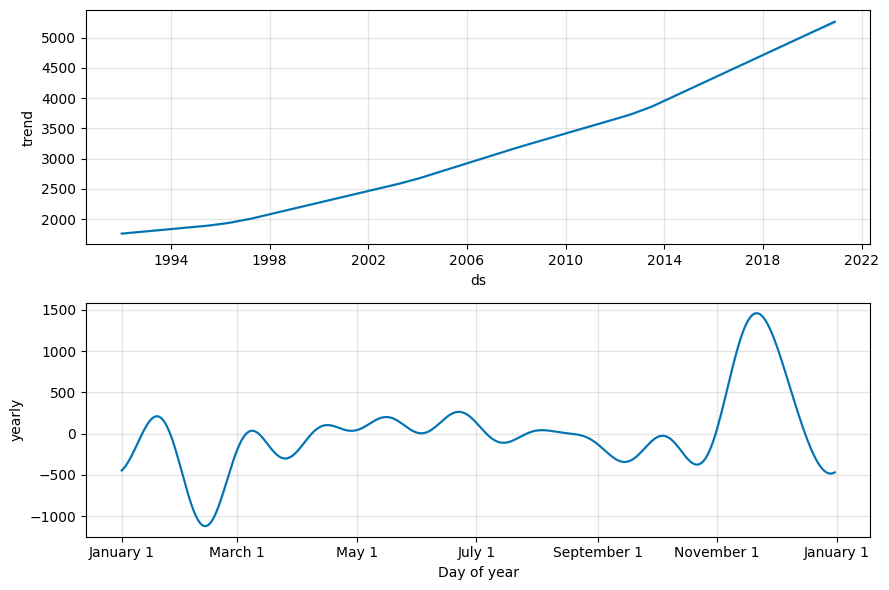

In [102]:
m.plot_components(forecast);

huge peak during the holidays